## EAE - Introduction to Programming Languages for Data 
## Day 7 - 24/11/2025

### Instructor:  
Enric Domingo   
edomingod@professional.eae.es

#### Python Libraries for Data:

1. Recap
2. Intro to Numpy
3. NDArrays
4. Main methods
5. Some examples and applications
6. Exercises

---
## 0. Recap

1. Intro to Libraries
2. Creating and using our first module
3. The Python Standard Library
4. The pip package installer and using external libraries
5. Exercisises


In [48]:
# Your turn: 
# Create a module random_funcs.py with a function called random_matrix(n) that returns 
# a list of lists of n x n random integer numbers between 0 and 9.
# Then, from this new module, import the function random_matrix and use it to create a 3x3 random matrix in this cell.

# For example random_matrix(3) could return: 
# [
#   [4, 0, 3], 
#   [1, 1, 9], 
#   [2, 7, 4]
# ]

# Your code here:

import random

def random_matrix(n):
    """
    Generates an n x n list of lists (matrix) filled with 
    random integers between 0 and 9 (inclusive).

    Args:
        n (int): The dimension (number of rows and columns) of the matrix.

    Returns:
        list: A list of lists representing the n x n matrix.
    """
    matrix = []
    
    # Outer loop to create 'n' rows
    for i in range(n):
        row = []
        # Inner loop to create 'n' columns (elements) for the current row
        for i in range(n):
            # Generate a random integer between 0 and 9
            random_num = random.randint(0, 9)
            row.append(random_num)
        
        # Add the completed row to the matrix
        matrix.append(row)
        
    return matrix

if __name__ == "__main__":
    # Example usage if the module is run directly
    print("Example 3*3 matrix:")
    example_matrix = random_matrix(3)
    for row in example_matrix:
        print(row)

Example 3*3 matrix:
[6, 5, 3]
[6, 0, 7]
[5, 9, 4]


In [49]:
# You turn:
# Create a function create_employee_report(name, surname, work_hours, hour_rate) that takes the name, surname, hours worked and salary rate of an employee and creates a file in a new salaries/ folder
# with the surname of the employee as the file name and the full name, gross salary and net salary (apply 20% of taxes) as the content of the file.

# For example, create_employee_report("Mary", "Smith", 40, 10) should create a file salaries/Smith.txt with the following content:
# Mary Smith
# Gross Salary: 400.0 eur
# Net Salary: 320.0 eur

# Your code here:

import pathlib

def create_employee_report(name: str, surname: str, work_hours: float, hour_rate: float):
    """
    Calculates the employee's salary (gross and net) and creates a report file
    in the 'salaries/' folder.

    Args:
        name (str): The first name of the employee.
        surname (str): The last name of the employee.
        work_hours (float): The total hours worked.
        hour_rate (float): The hourly salary rate.
    """
    
    # --- 1. Salary Calculation ---
    
    # Gross Salary = work_hours * hour_rate
    gross_salary = work_hours * hour_rate
    
    # Net Salary = Gross Salary - 20% Tax
    TAX_RATE = 0.20
    net_salary = gross_salary * (1 - TAX_RATE)
    
    # --- 2. Prepare File Path and Directory ---
    
    # Define the output directory name
    output_dir = pathlib.Path("salaries")
    
    # Check if the 'salaries/' directory exists; create it if it doesn't.
    # exist_ok=True prevents an error if the directory already exists.
    try:
        output_dir.mkdir(exist_ok=True)
    except OSError as e:
        print(f"Error creating directory {output_dir}: {e}")
        return
    
    # Define the file path: salaries/{surname}.txt
    file_name = f"{surname}.txt"
    file_path = output_dir / file_name # Concise path joining using pathlib
    
    # --- 3. Prepare File Content ---
    
    # Format the report content, using .2f to ensure salaries have two decimal places
    report_content = (
        f"{name} {surname}\n"
        f"Gross Salary: {gross_salary:.2f} eur\n"
        f"Net Salary: {net_salary:.2f} eur"
    )
    
    # --- 4. Write to File ---
    
    # Open the file in 'w' (write) mode. If it exists, it will be overwritten.
    try:
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(report_content)
        
        print(f"✅ Success! Report saved to: {file_path}")
        
    except IOError as e:
        print(f"Error writing file {file_path}: {e}")

# ----------------------------------------------------------------------
# Example Execution
# ----------------------------------------------------------------------
if __name__ == "__main__":
    
    # Example 1: Using the provided example
    print("--- Running Example 1 ---")
    create_employee_report("Mary", "Smith", 40, 10)
    
    # Example 2: Testing another employee
    print("\n--- Running Example 2 ---")
    create_employee_report("John", "Doe", 160, 25.50)

    # Example 3: Testing when the folder already exists
    print("\n--- Running Example 3 ---")
    create_employee_report("Jane", "Austen", 80, 15)

# The program will create a directory named 'salaries' and 
# create 'Smith.txt', 'Doe.txt', and 'Austen.txt' files inside it.i


--- Running Example 1 ---
✅ Success! Report saved to: salaries/Smith.txt

--- Running Example 2 ---
✅ Success! Report saved to: salaries/Doe.txt

--- Running Example 3 ---
✅ Success! Report saved to: salaries/Austen.txt


---
## 1. Intro to Numpy

NumPy (Numerical Python) is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. Arrays are data structures that store values of same data type. In Python, this is the main difference between arrays and lists. While python lists can contain values corresponding to different data types, arrays in python can only contain values corresponding to same data type.

### Why use NumPy?

In Python we have lists that serve the purpose of arrays, but they are slow to process. NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. NumPy also provides a lot of mathematical functions that can be performed on arrays, which are not possible with lists. For example, if we try to multiply two lists, it will result in an error. But with NumPy, it will multiply each element of the array.

The array object in NumPy is called ndarray, it provides a lot of supporting functions that make working with ndarray very easy. Arrays are very frequently used in data science, where speed and resources are very important.

### Installing NumPy

The NumPy library is usually installed from PyPI using pip from the terminal:

```bash
pip install numpy
```

In [50]:
# alternatively

!pip install numpy

After installing it, we can already import it and use it in our code. NumPy is usually imported and used under the np alias for convenience:

In [51]:
import numpy as np

---
## 2. NDArrays

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes. The number of axes is rank. 


In [52]:
arr = np.array([1, 2, 3])    # creating an array with one dimension and 3 elements

arr

array([1, 2, 3])

In [53]:
type(arr)

numpy.ndarray

In [91]:
arr2 = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)   # creating an array from a list of lists, so a 2D array

arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [92]:
# zeros

arr3 = np.zeros((12, 5))         # matrix of 2 rows and 3 columns with all zeros

arr3

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [56]:
# ones

arr4 = np.ones((4, 3, 2))       # matrix of 4x3x2 with all 1s

arr4

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [57]:
# random

arr5 = np.random.random((2, 2))     # 2x2 array of random numbers between 0 and 1

arr5

array([[0.15453008, 0.56826113],
       [0.48611886, 0.17390112]])

In [58]:
arr6 = np.random.randint(0, 10, (3, 3))    # Start, End, Size

arr6

array([[7, 8, 0],
       [1, 1, 5],
       [2, 5, 7]])

In [59]:
arr7 = np.random.rand(3, 4)     # 3x4 array of random numbers between 0 and 1

arr7

array([[0.79928717, 0.55013279, 0.77946736, 0.52374357],
       [0.50661501, 0.94165221, 0.58982999, 0.02707175],
       [0.18694273, 0.56407347, 0.48773826, 0.77118986]])

---
## 3. Main methods

- **ndarray.ndim**: the number of axes (dimensions) of the array.

- **ndarray.shape**: the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim.

- **ndarray.dtype**: an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

- **Indexing and Slicing**: we can use slices to select a range of items in an array. For example, 2:5 will select items starting from index 2 upto 5(not including 5)

- **Basic array operations**: Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. We can use the standard arithmetic operators +, -, *, /, and ** with arrays.

- **Array broadcasting**: NumPy arrays differ from a normal Python list because of their ability to broadcast. With broadcasting, NumPy can work with arrays of different shapes when performing arithmetic operations. Sometimes, we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

In [60]:
# ndim and shape

arr = np.array([1, 2, 3, 4, 5])

print(arr.ndim)
print(arr.shape)

print(arr)

1
(5,)
[1 2 3 4 5]


In [61]:
arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2.ndim)
print(arr2.shape)

print(arr2)

2
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [93]:
arr3 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(arr3.ndim)
print(arr3.shape)

print()
print(arr3)

3
(2, 2, 3)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [63]:
# dtype

arr = np.array([1, 2, 3, 4])

print(arr.dtype)    # int32

int64


In [64]:
arr = np.array(["apple", "banana", "cherry"])

print(arr.dtype)    # <U6 (unicode string of max 6 chars)

<U6


In [65]:
arr = np.array([1., 2., 3., 4.])

print(arr.dtype)    # float64

float64


In [66]:
arr = np.array([1, 2, 3, 4], dtype="int8")      # We can define the data type as well

print(arr.dtype)    # int8

int8


In [67]:
# Indexing and Slicing

arr = np.array([1, 2, 3, 4])

print(arr[0])       # 1

1


In [68]:
arr = np.array(
    [
        [1, 2, 3, 4, 5], 
        [6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]
    ]
)

print(arr[0, 1])    # 2

2


In [69]:
print(arr[1, 1:4])

[7 8 9]


In [70]:
print(arr[1:4, 1:4])

[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


In [71]:
print(arr[:2, :-1])

[[1 2 3 4]
 [6 7 8 9]]


In [72]:
# Basic array operations

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Addition 

arr + 2

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [73]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [74]:
# Subtraction

arr - 2

array([[-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [75]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [76]:
# Multiplication

arr * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [77]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [78]:
# Division

arr / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ],
       [3.5, 4. , 4.5]])

In [79]:
arr / arr

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [80]:
# Numpy calculates so much fast than Python default elements

from time import time

large_list = list(range(10_000_000))

t0 = time()

# Multiply each element by 2
result_list = []
for num in large_list:
    result_list.append(num * 2)

print(f"Time taken by Python List and For loop: {time() - t0:.3f} seconds")

result_list[:10]  # Printing first 10 elements

Time taken by Python List and For loop: 1.638 seconds


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [81]:
# Now let's do the same with Numpy

large_arr = np.array(large_list)  # we convert the large list into a Numpy array first

t0 = time()

# Multiply each element by 2
result_arr = large_arr * 2

print(f"Time taken by Numpy Array and Vectorized operation: {time() - t0:.3f} seconds")

result_arr[:10]  # Printing first 10 elements

Time taken by Numpy Array and Vectorized operation: 0.075 seconds


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [82]:
# NumPy has been around 50 times faster than Python List and For loop in this case!!

In [83]:
# Broadcasting
# It is a set of rules by which some NumPy functions operate on arrays of different sizes and/or dimensions.

arr = np.array([[1, 2, 3], [4, 5, 6]])

arr + 2

array([[3, 4, 5],
       [6, 7, 8]])

In [84]:
arr2 = np.array([1, 2, 3])

arr + arr2

array([[2, 4, 6],
       [5, 7, 9]])

In [85]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

arr2 = np.array([[1], [2]])

arr + arr2

array([[2, 3, 4],
       [6, 7, 8]])

---
## 4. Some examples and applications

- Image processing
- Statistics
- Linear algebra

In [86]:
!pip install pillow --quiet

In [87]:
# 1st Example: Image processing

import numpy as np
from PIL import Image



In [88]:
!pip install matplotlib --quiet

Matplotlib is building the font cache; this may take a moment.


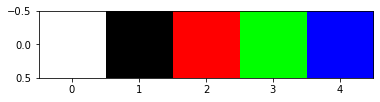

In [89]:
# Using matplotlib to display the image data
import matplotlib.pyplot as plt

# Let's visualize some few pixels 
plt.imshow(np.array([[[255, 255, 255], [0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]],]))  # [Red, Green, Blue]

In [94]:
# Example image link: https://t3.ftcdn.net/jpg/05/65/73/56/360_F_565735615_D2uX6alZuUOu77bJkfh5JKJbKmyZmxNu.jpg
# Download the image and save it as cat_img.jpg in the same folder as this notebook

# Open an image file
with Image.open("cat_img.jpg") as img:
    # Convert the image data to a NumPy array
    img_data = np.array(img)

print(img_data.shape)

# Visualize the image data array
img_data

(360, 540, 3)


array([[[ 68, 116, 130],
        [ 58, 105, 121],
        [ 67, 110, 127],
        ...,
        [ 29,  66,  84],
        [ 22,  55,  72],
        [ 67,  99, 114]],

       [[ 67, 116, 130],
        [ 57, 104, 120],
        [ 64, 110, 126],
        ...,
        [ 29,  66,  84],
        [ 22,  55,  72],
        [ 67,  99, 114]],

       [[ 64, 116, 129],
        [ 56, 105, 119],
        [ 63, 110, 126],
        ...,
        [ 29,  66,  84],
        [ 20,  56,  72],
        [ 67,  99, 114]],

       ...,

       [[ 25,  65,  65],
        [  3,  42,  41],
        [ 11,  50,  49],
        ...,
        [ 77,  94, 101],
        [ 67,  82,  89],
        [109, 122, 130]],

       [[ 26,  66,  65],
        [  3,  43,  42],
        [ 13,  53,  52],
        ...,
        [ 82,  99, 106],
        [ 72,  87,  94],
        [113, 126, 134]],

       [[ 29,  69,  68],
        [  7,  47,  46],
        [ 16,  58,  56],
        ...,
        [ 91, 108, 115],
        [ 80,  95, 102],
        [121, 134, 142]]

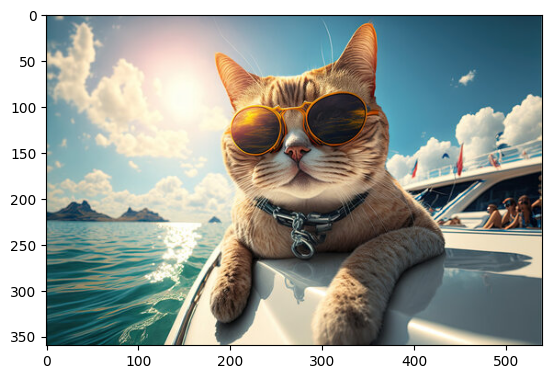

In [ ]:
plt.imshow(img_data)

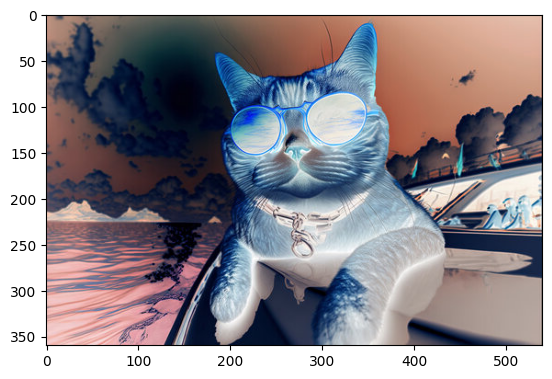

In [ ]:
# Invert all the pixel values
inverted_img_data = 255 - img_data

# Convert the inverted data back into an image
inverted_img = Image.fromarray(inverted_img_data)
# Save the new image
inverted_img.save('inverted_image.jpg')

plt.imshow(inverted_img_data)

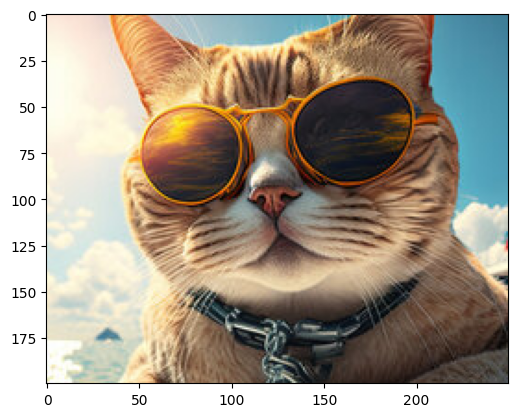

In [ ]:
# Crop the image

# crop coordinates
x1 = 150
x2 = 400
y1 = 50
y2 = 250

cropped_img_data = img_data[y1:y2, x1:x2, :]   # We are slicing the array to get the cropped image data

plt.imshow(cropped_img_data)

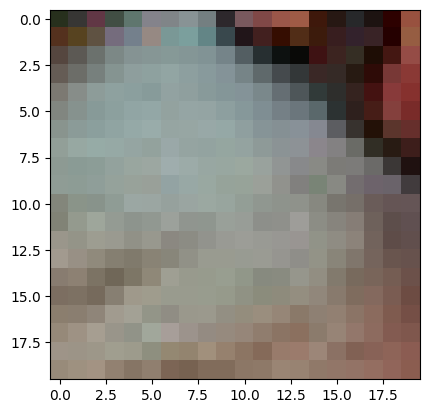

In [ ]:
# crop coordinates
x1 = 250
x2 = 270
y1 = 150
y2 = 170

cropped_img_data = img_data[y1:y2, x1:x2, :]   # We are slicing the array to get the cropped image data

plt.imshow(cropped_img_data)

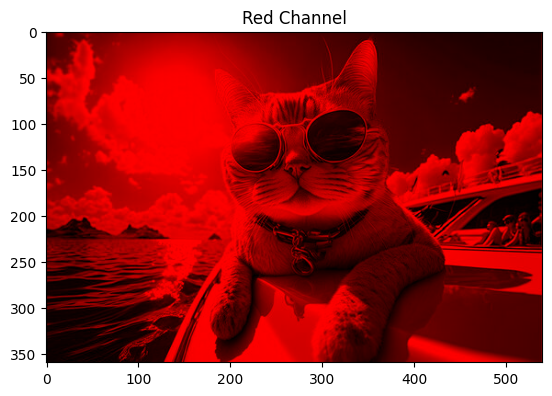

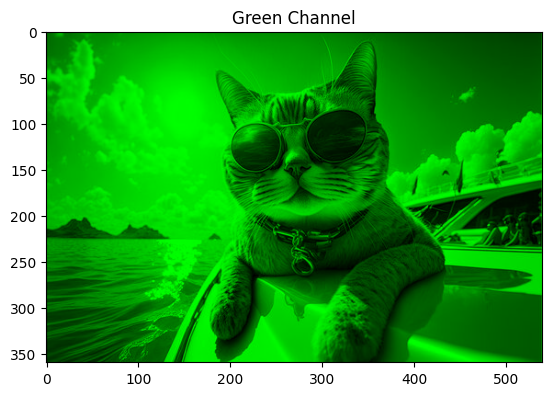

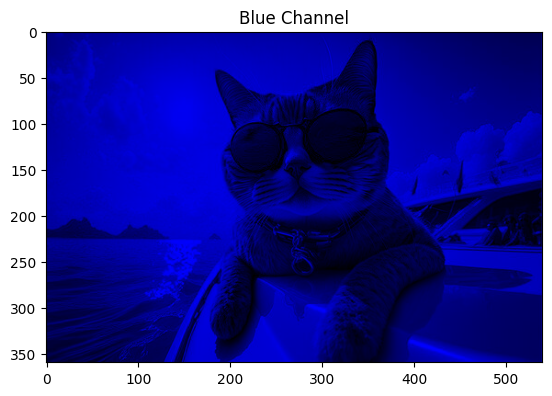

In [ ]:
# Visualize the color channels

# Isolate RGB channels
red_channel = img_data.copy()
red_channel[:, :, 1:] = 0
green_channel = img_data.copy()
green_channel[:, :, [0, 2]] = 0
blue_channel = img_data.copy()
blue_channel[:, :, :2] = 0

# Plot the red channel
plt.imshow(red_channel, cmap="gray")
plt.title("Red Channel")
plt.show()
plt.imshow(green_channel, cmap="gray")
plt.title("Green Channel")
plt.show()
plt.imshow(blue_channel, cmap="gray")
plt.title("Blue Channel")
plt.show()

RGB img shape:  (360, 540, 3)
Grayscale img shape: (360, 540)


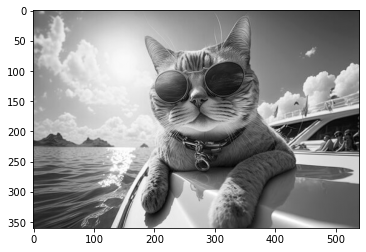

In [95]:
# Converting to grayscale (black and white)

# Average out the RGB values
gray_img_data = img_data.mean(axis=2)

print("RGB img shape: ", img_data.shape)
print("Grayscale img shape:", gray_img_data.shape)

# Plot the grayscale image
plt.imshow(gray_img_data, cmap="gray")
plt.show()

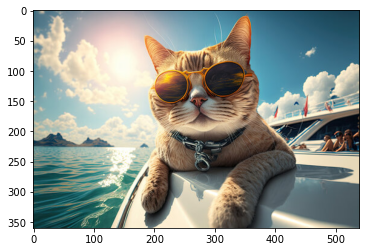

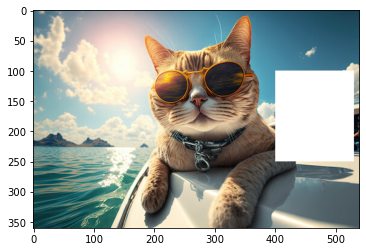

In [96]:
# Adding shapes to the image

copy_img_data = img_data.copy()

# rectangle coordinates
x1 = 400
x2 = 530
y1 = 100
y2 = 250

copy_img_data[y1:y2, x1:x2, :] = 255  # We are slicing the array to transform the pixel values of that area

plt.imshow(img_data)
plt.show()

plt.imshow(copy_img_data)
plt.show()

In [ ]:
# 2nd Example: Statistics

# Assume we have a list of ages.
ages = [23, 23, 27, 27, 39, 41, 47, 49, 50, 52, 54, 54, 56, 57, 58, 58, 60, 61]

# We can convert the list to a NumPy array
ages = np.array(ages)

# Now we can easily calculate some useful descriptive statistics
print("Mean:", np.mean(ages))
print("Median:", np.median(ages))
print("Standard Deviation:", np.std(ages))
print("Variance:", np.var(ages))
print("Min:", np.min(ages))
print("Max:", np.max(ages))
print("Range:", np.max(ages) - np.min(ages))
print("25th percentile:", np.percentile(ages, 25))
print("50th percentile:", np.percentile(ages, 50))
print("75th percentile:", np.percentile(ages, 75))


Mean: 46.44444444444444
Median: 51.0
Standard Deviation: 12.846193652519204
Variance: 165.0246913580247
Min: 23
Max: 61
Range: 38
25th percentile: 39.5
50th percentile: 51.0
75th percentile: 56.75


In [ ]:
# 3rd Example: Linear Algebra

# 1*x1 + 2*x2 = 5
# 3*x1 + 4*x2 = 6

# Coefficients matrix
A = np.array([[1, 2], [3, 4]])

# Constants matrix
B = np.array([5, 6])

# Solve the system of equations
x = np.linalg.solve(A, B)

print(x)

[-4.   4.5]


---
## 5. Exercises

#### Ex 1. 

Create a 3x3 array with values ranging from 2 to 10. 

In [ ]:
# Your code here

#### Ex 2.

Create a 10x10 array with random integer values between 0 and 1000, and find the minimum, maximum and mean values.

In [ ]:
# Your code here

#### Ex 3.

Our company has 5 stores. We have every store monthly sales for the year in a different list. Create a 12x5 array with the data and calculate the total revenue for the year, the average monthly revenue and the average revenue for each store.

Then apply a 21% of taxes to the hole matrix of sales to know the final net revenue after taxes and print the total company revenue for the year after taxes as well.

You can create new variables for every value that you need to calculate or simply print it with a message of what it is.


In [ ]:
store1_sales = [1888, 2572, 4030, 764, 4496, 1887, 1842, 3594, 826, 2936, 301, 1956]
store2_sales = [291, 28460, 27650, 11550, 33558, 35007, 31429, 993, 6579, 12407, 21800, 16981]
store3_sales = [19645, 18927, 19880, 1294, 14072, 7973, 5492, 5845, 19796, 14062, 12667, 170]
store4_sales = [15121, 1725, 28133, 25976, 2256, 253, 19535, 1089, 4889, 15189, 30500, 580]
store5_sales = [4935, 1924, 7061, 2129, 7149, 5367, 1001, 2114, 66, 1195, 394, 3194]

In [ ]:
# Your code here

#### Ex 4.

Download the following picture with the name "messi.jpg". 

https://en.wikipedia.org/wiki/Football#/media/File:Lionel_Messi_vs_Valladolid_3.jpg

Then, using PIL library, load the image and convert it to a numpy array. Print the shape of the array to know the dimensions of the image. Then transform the image in order to place a black square on top of the ball, so making it no longer visible, and display it with the matplotlib plt.imshow function.

In [ ]:
# Your code here